In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv('../datasets/train_clean.csv')

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

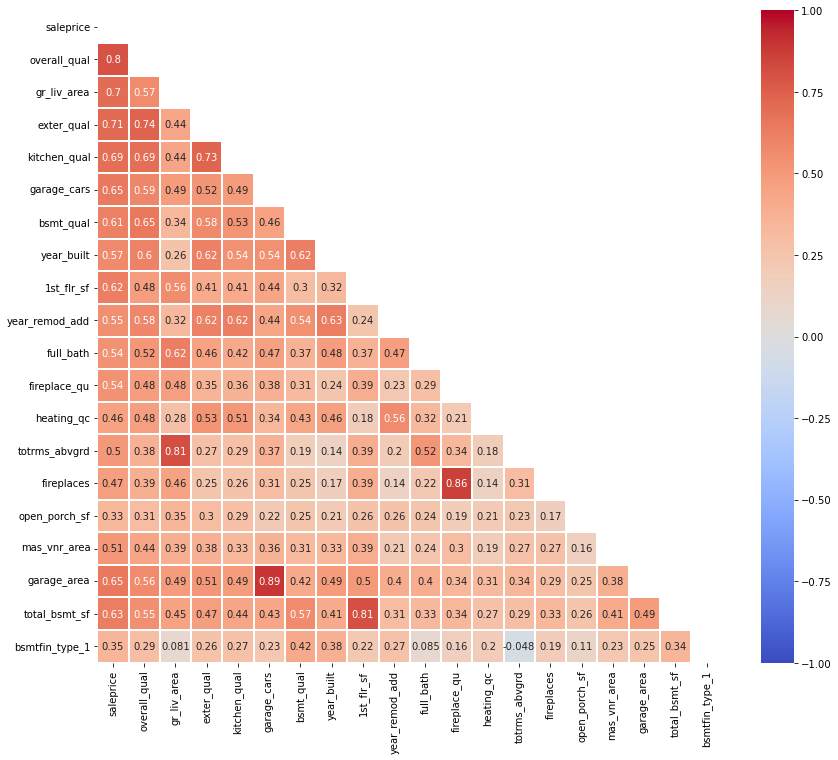

In [4]:
# columns/features I wanted to take a look at
corr_test = [
    'saleprice',
    "overall_qual",
    "gr_liv_area",
    "exter_qual",
    "kitchen_qual",
    "garage_cars",
    "bsmt_qual",
    'year_built',
    "1st_flr_sf",
    "year_remod_add",
    "full_bath",
    "fireplace_qu",
    'heating_qc',
    'totrms_abvgrd',
    "fireplaces",
    'open_porch_sf',
    'mas_vnr_area',
    "garage_area",
    "total_bsmt_sf",
    "bsmtfin_type_1",
]

# mask created by jeff, taken from lessons
mask = np.zeros_like(housing[corr_test].corr())
mask[np.triu_indices_from(mask)] = True

# inspiration for heatmap parameters comes from jeff's work
plt.figure(figsize=(14, 12))
sns.heatmap(
    housing[corr_test].corr(),
    cmap="coolwarm",
    annot=True,
    mask=mask,
    vmin=-1.0,
    vmax=1.0,
    linewidths=0.01,
    center=0,
);

*Interpretation: This heatmap gives a first look at how certain features affect sale price and if there is any multicolinearity between features. Obvious features like garage cars and garage area appear to have a relationship.*

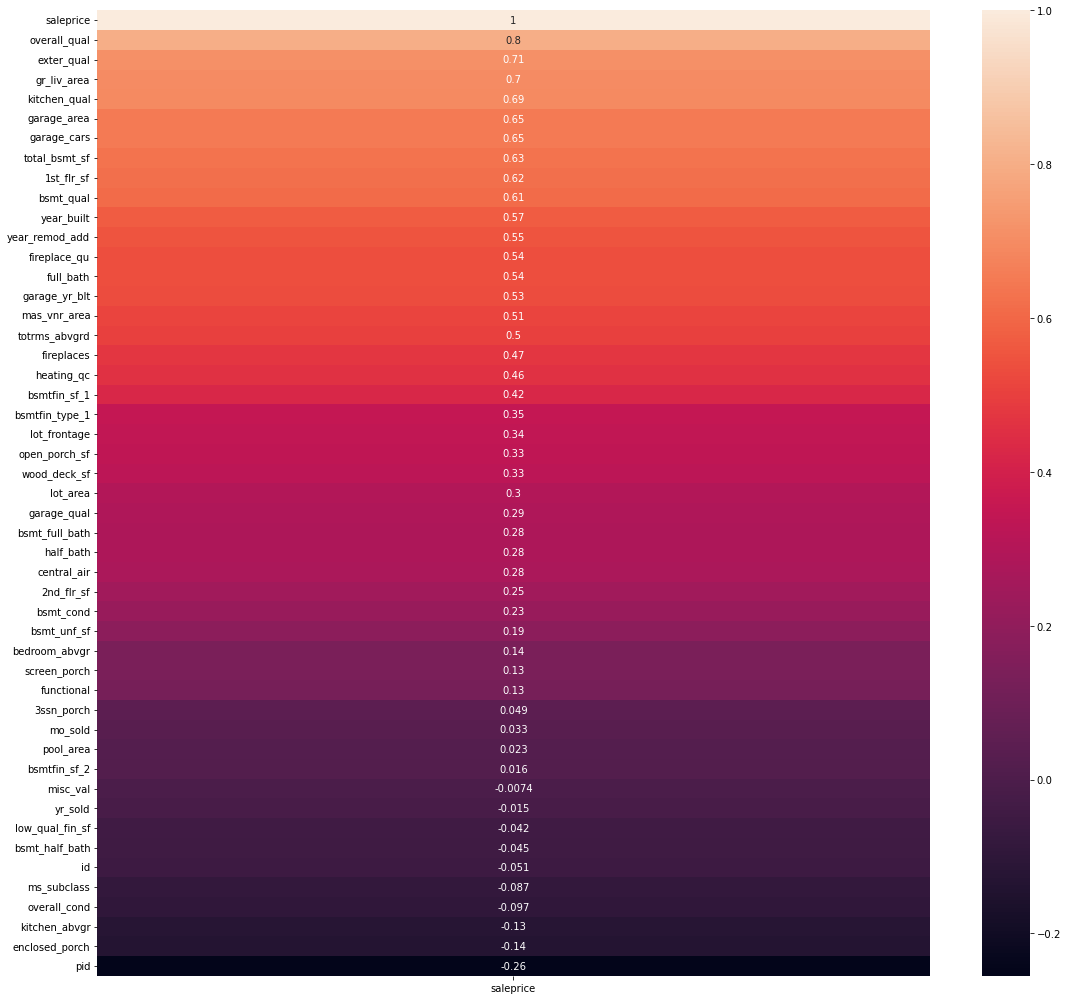

In [5]:
# sweet method of creating a heat map that katie shared with the class
plt.figure(figsize=(16,14))
sns.heatmap(
    housing.corr()[['saleprice']].sort_values(by='saleprice', ascending=False),
    annot=True,
)

plt.tight_layout();

*Interpretation: This heatmap focus just on the relationship between features and the sale price. Features at the top with the strongest correlation will start off being the main focus.*

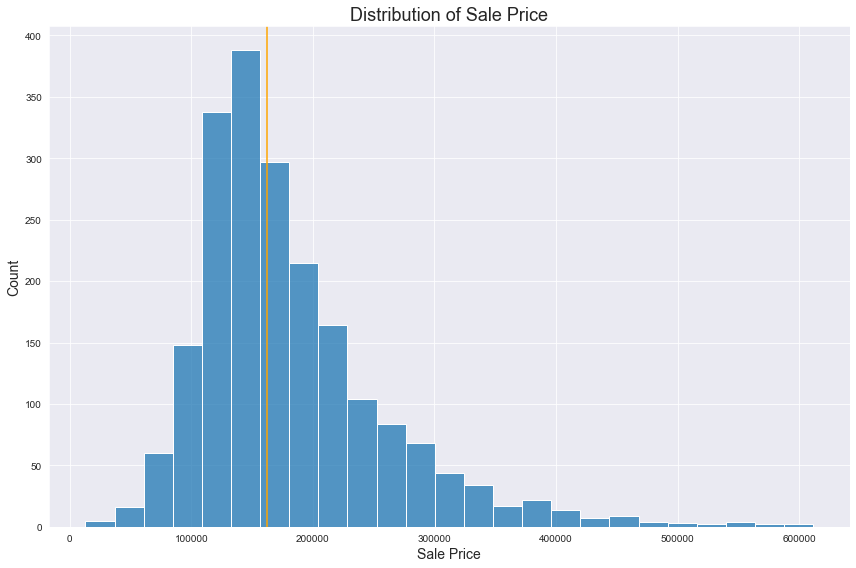

In [6]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')

sns.histplot(housing['saleprice'], bins=25)
plt.axvline(x=housing['saleprice'].median(), color='orange')

plt.title('Distribution of Sale Price', fontsize=18)
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.tight_layout()

plt.savefig('../images/graphs/distribution.png')

*Interpretation: This is a distribution of sale prices in the dataset. This is a normal distribution with just a small percentage of houses selling for more than $400,000. The median, or middle value is represented with the vertical line. This value is around $160,000.*

In [7]:
housing['saleprice'].median()

162500.0

### Data frame for neighborhood, number of houses sold, and average sale price

In [8]:
# data frame of each neighborhod and how many houses sold their were
houses_sold = pd.DataFrame(
   housing[['neighborhood']].value_counts(),
   columns=['houses_sold']
)
houses_sold.reset_index(inplace=True)

# grabbing all the neighborhoods and their corresponding average sale price
mean_hood_price = housing.groupby('neighborhood')[['saleprice']].mean()
mean_hood_price.reset_index(inplace=True)

# merging the two data frames to get the number of houses sold and average sale price for each neighborhood
hoods = pd.merge(houses_sold, mean_hood_price, on='neighborhood')

In [9]:
hoods.head(2)

,neighborhood,houses_sold,saleprice
0,NAmes,310,145905.816129
1,CollgCr,180,202497.216667


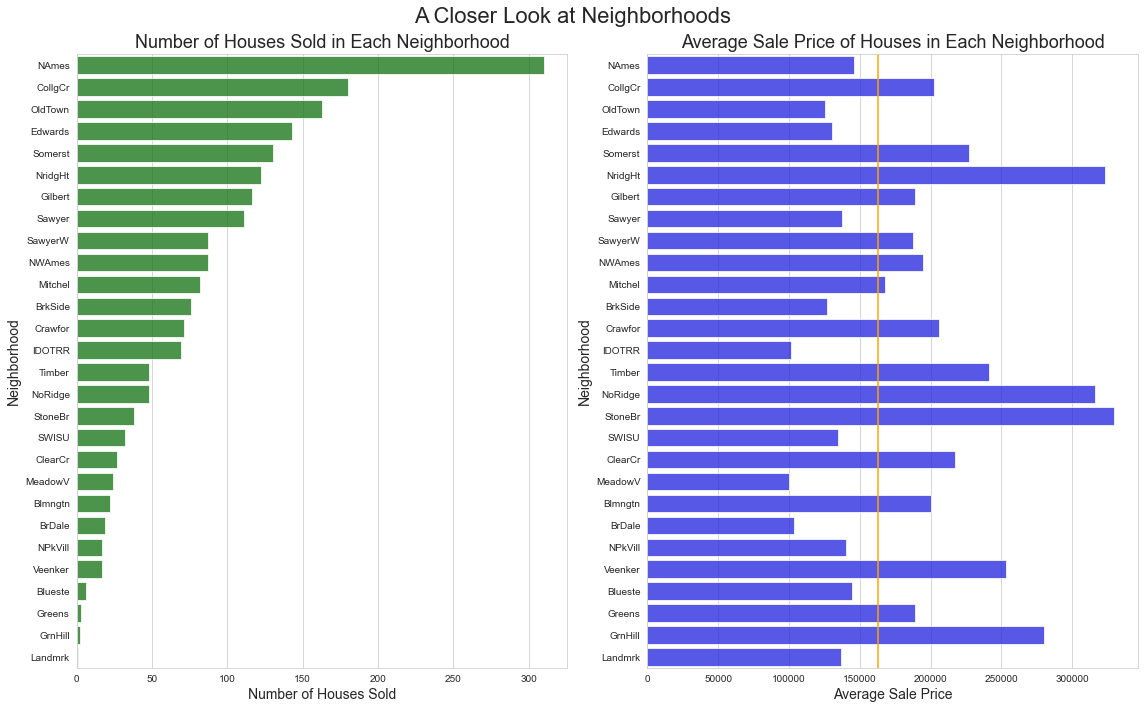

In [10]:
plt.figure(figsize=(16,10))
plt.suptitle('A Closer Look at Neighborhoods', fontsize=22)
sns.set_style('whitegrid')

ax1 = plt.subplot(1, 2, 1)
sns.barplot(
    data=houses_sold, 
    x='houses_sold',
    y='neighborhood', 
    orient='h',
    color='green',
    alpha=.75
)
ax1.set_title('Number of Houses Sold in Each Neighborhood', fontsize=18)
plt.xlabel('Number of Houses Sold', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)


ax2 = plt.subplot(1, 2, 2)
sns.barplot(
    data=hoods, 
    x='saleprice',
    y='neighborhood', 
    orient='h',
    color='blue',
    alpha=.75
)
ax2.set_title('Average Sale Price of Houses in Each Neighborhood', fontsize=18)
plt.xlabel('Average Sale Price', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)
ax2.axvline(x=housing['saleprice'].median(), color='orange')

plt.tight_layout()

plt.savefig('../images/graphs/neighborhoods.png');

*Interpretation: These bar charts display the number of houses sold and average sale price for each neighborhood. There are big differences in number of houses sold across all neighborhoods. Northern Ames is the clear front-runner and has a average sale price of just under the median. Stone Brook and Northridge Heights are two of the most expensive neighborhoods.*

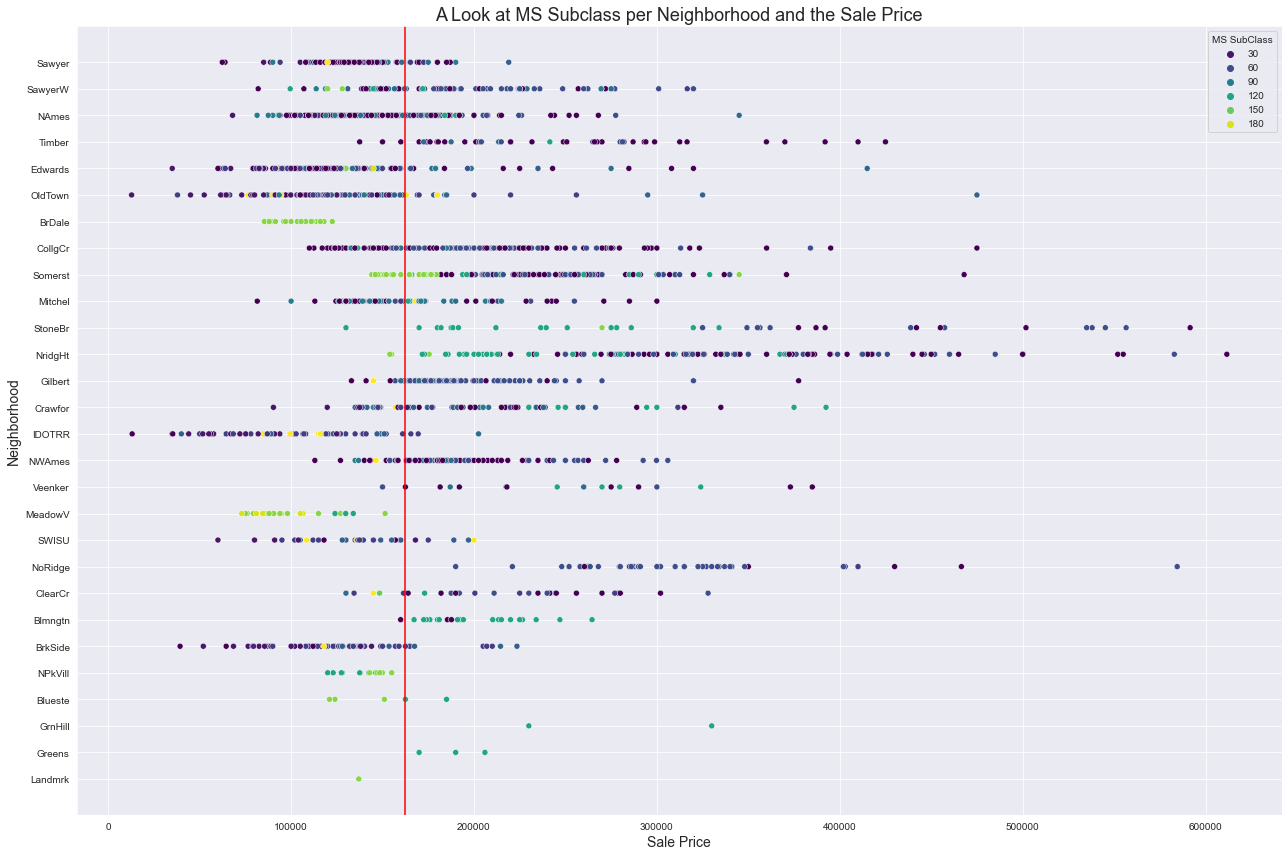

In [11]:
plt.figure(figsize=(18,12))
sns.set_style('darkgrid')

sns.scatterplot(
    data=housing, 
    x='saleprice', 
    y='neighborhood', 
    palette='viridis', 
    hue='ms_subclass'
)
plt.axvline(x=housing['saleprice'].median(), color='red')

plt.title('A Look at MS Subclass per Neighborhood and the Sale Price', fontsize=18)
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)
plt.legend(title='MS SubClass')

plt.tight_layout()

plt.savefig('../images/graphs/subclass.png');

*Interpretation: Here we are looking at the subclass in each neighborhood and the sale price. Different colors represent different subclasses. These lighter colored dots are a part of a PUD subclass. Most of these houses are valued below average or right around the average. Home buyers should understand houses that are classified as Planned Unit Development properties and if that is something that want.*

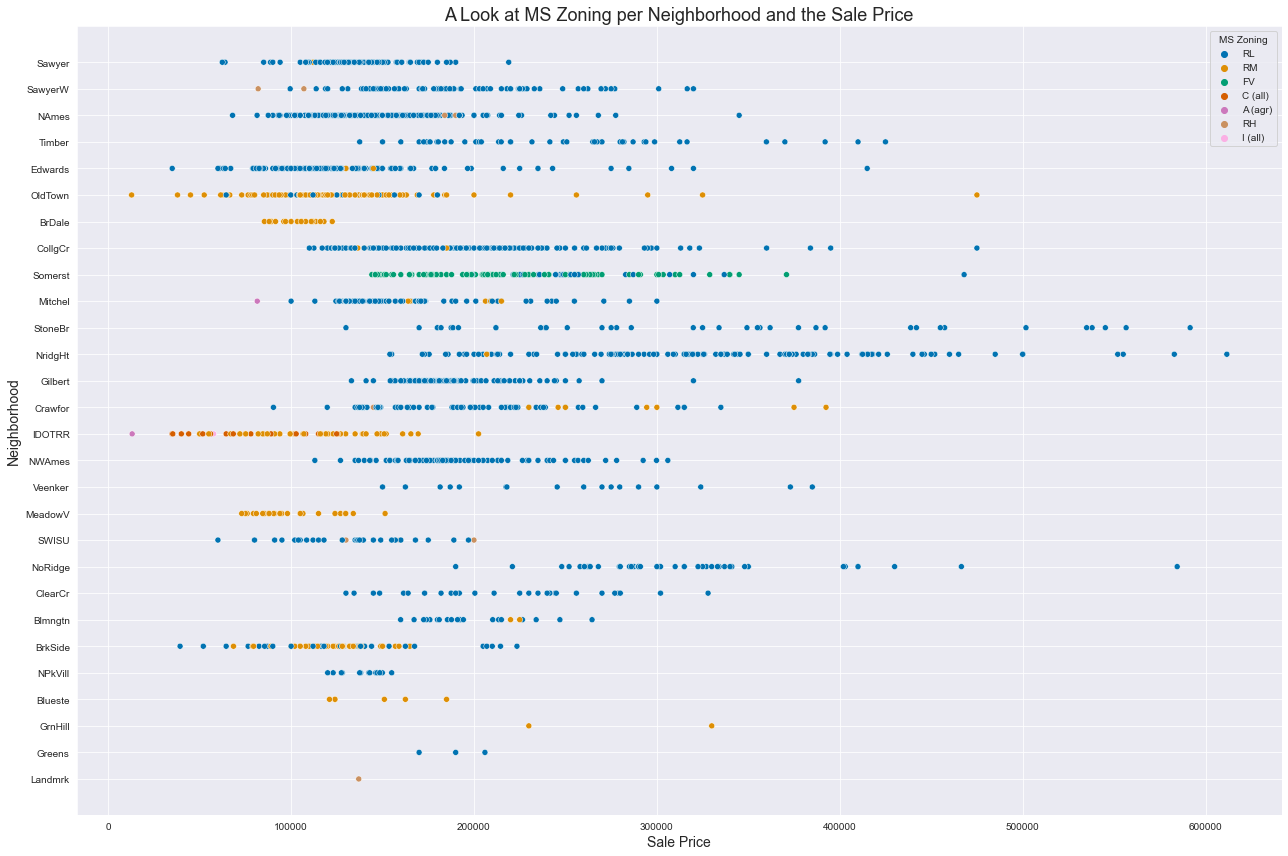

In [12]:
plt.figure(figsize=(18,12))
sns.set_style('darkgrid')

sns.scatterplot(
    data=housing, 
    x='saleprice', 
    y='neighborhood', 
    palette='colorblind', 
    hue='ms_zoning'
)

plt.title('A Look at MS Zoning per Neighborhood and the Sale Price', fontsize=18)
plt.xlabel('Sale Price', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)
plt.legend(title='MS Zoning')

plt.tight_layout()

plt.savefig('../images/graphs/zoning.png');

*Interpretation: This graph is very similar to the last, except now we are looking at zoning instead of subclass. Medium Density Residential properties are around the average price or below average. The houses in Somerset are an interesting zone and could be an attractive option for some buyers.*

### Data frame for month sold, number of houses sold, and average sale price

In [13]:
#
houses_sold_per_month = pd.DataFrame(
   housing[['mo_sold']].value_counts(),
   columns=['houses_sold']
)
houses_sold_per_month.reset_index(inplace=True)

#
mean_month_price = housing.groupby('mo_sold')[['saleprice']].mean()
mean_month_price.reset_index(inplace=True)

#
months = pd.merge(houses_sold_per_month, mean_month_price, on='mo_sold')

In [14]:
months.head(2)

,mo_sold,houses_sold,saleprice
0,6,352,182662.798295
1,7,303,188571.514851


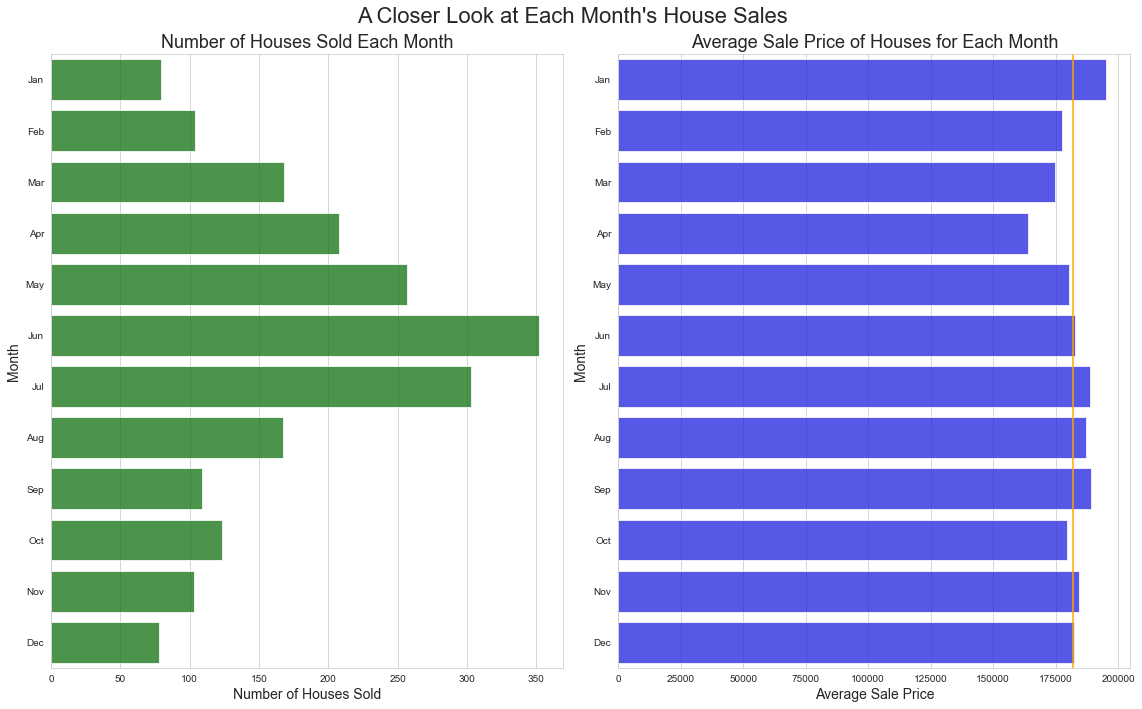

In [15]:
plt.figure(figsize=(16,10))
plt.suptitle("A Closer Look at Each Month's House Sales", fontsize=22)
sns.set_style('whitegrid')

ax1 = plt.subplot(1, 2, 1)
sns.barplot(
    data=months, 
    x='houses_sold',
    y='mo_sold', 
    orient='h',
    color='green',
    alpha=.75
)
ax1.set_title('Number of Houses Sold Each Month', fontsize=18)
plt.xlabel('Number of Houses Sold', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.yticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


ax2 = plt.subplot(1, 2, 2)
sns.barplot(
    data=months, 
    x='saleprice',
    y='mo_sold', 
    orient='h',
    color='blue',
    alpha=.75
)
ax2.set_title('Average Sale Price of Houses for Each Month', fontsize=18)
plt.xlabel('Average Sale Price', fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.yticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax2.axvline(x=months['saleprice'].mean(), color='orange')

plt.tight_layout()

plt.savefig('../images/graphs/months.png');

*Interpretation: This bar chart displays the number of houses sold for each month and the average sale price in that month. The summer months have the most sales, the month doesn't have much of an impact on sale price.*

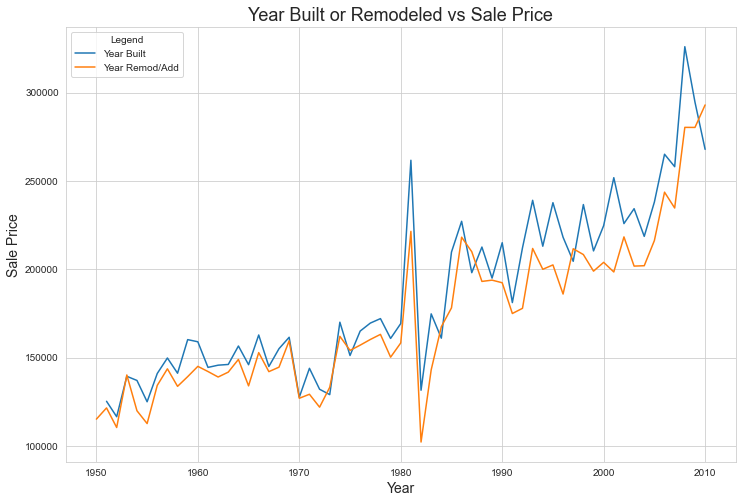

In [16]:
plt.figure(figsize=(12,8))

sns.lineplot(data=housing[housing['year_built'] > 1950], x='year_built', y='saleprice', err_style=None)
sns.lineplot(data=housing, x='year_remod_add', y='saleprice', err_style=None)

plt.title('Year Built or Remodeled vs Sale Price', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.legend(labels=['Year Built','Year Remod/Add'], title='Legend')

plt.savefig('../images/graphs/years.png');

*Interpretation: This line graph compares the sale price over the years. One line represents the year built, the other represents the year it was remodeled, had additions, or the construction date if there were no remodels. The lines follow each other fairly close. An interesting thing to note is the consistent peaks and valleys of the year built. This may be from construction cycles. Builders start projects that take a couple years, those sell, and then on to the next builds.*

### For loop to display and save multiple graphs

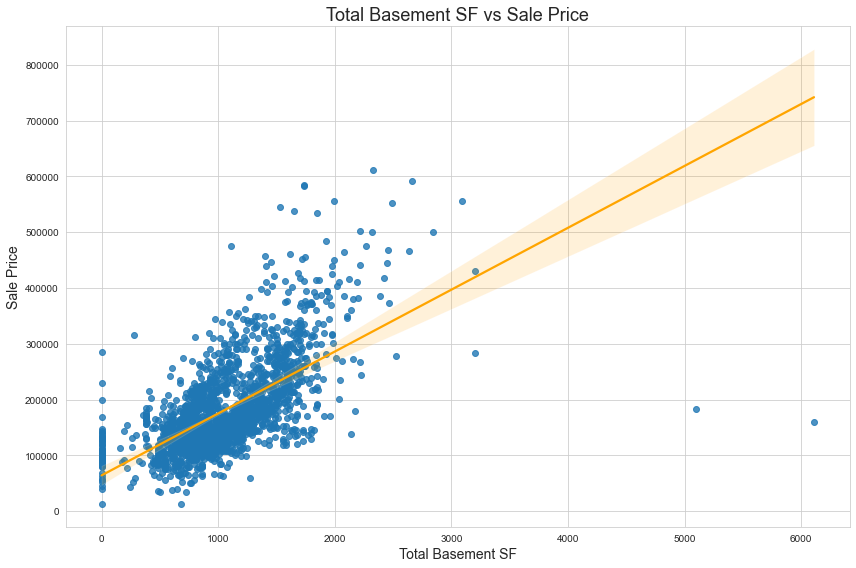

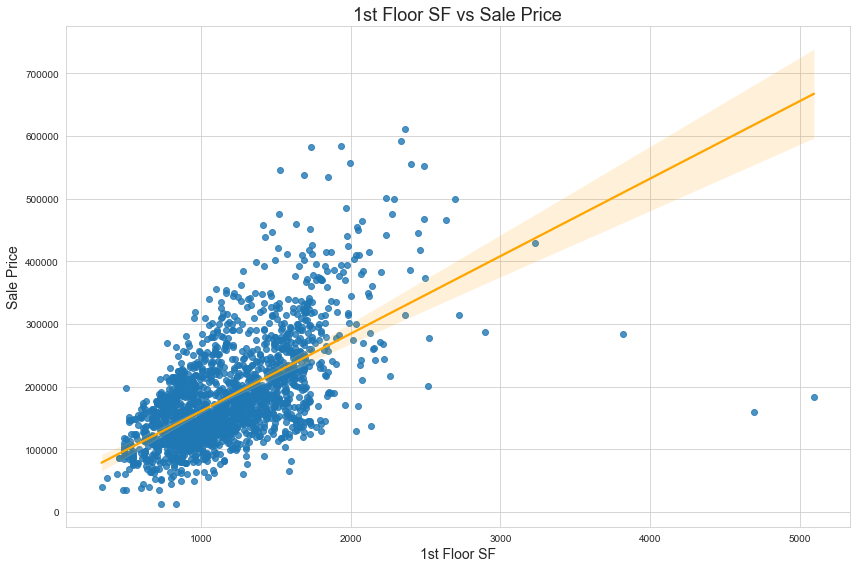

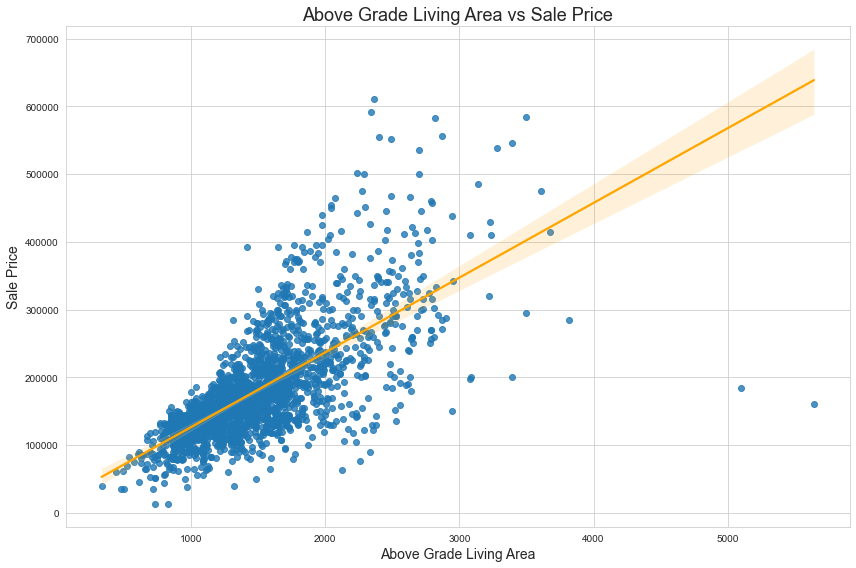

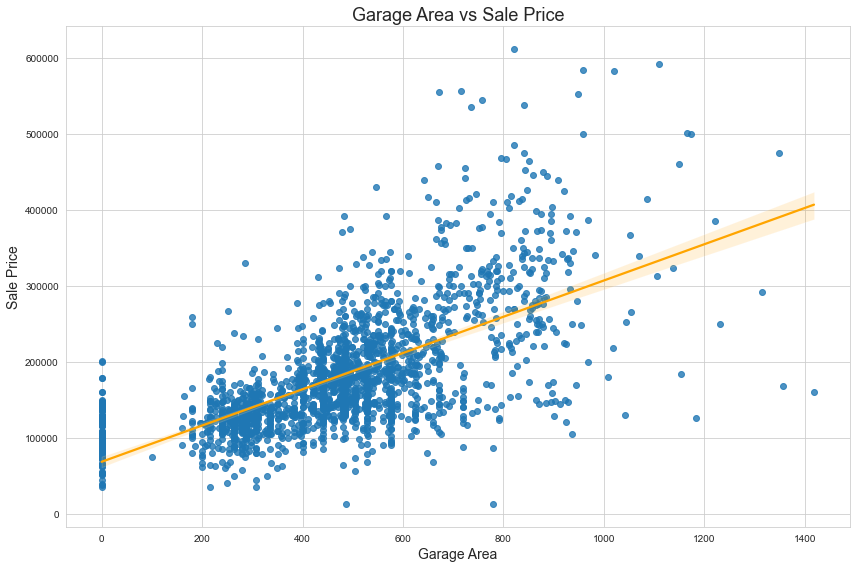

In [17]:
# column names to iterate through
features = [
    "total_bsmt_sf",
    "1st_flr_sf",
    "gr_liv_area",
    "garage_area",
]

# column names transformed into more readable text for titles and labels
features_full = [
    "Total Basement SF",
    "1st Floor SF",
    "Above Grade Living Area",
    "Garage Area",
]

# for loop to display and save graphs
for index, feature in enumerate(features):
    plt.figure(figsize=(12, 8))
    sns.regplot(
        data=housing, 
        x=feature, 
        y="saleprice", 
        line_kws={"color": "orange"}
    )
    plt.title(f'{features_full[index]} vs Sale Price', fontsize=18)
    plt.xlabel(f'{features_full[index]}', fontsize=14)
    plt.ylabel('Sale Price', fontsize=14)

    plt.tight_layout()

    plt.savefig(f'../images/graphs/{feature}.png');

*Interpretation: All four of these graphs show a positive linear correlation. When one variable increases, so does the other. Something to note on the Total Basement SF and Garage area graphs are the cluster of zeros. By not having a basement or garage, it puts a cap on the potential value of a home.*

### For loop to display and save multiple graphs

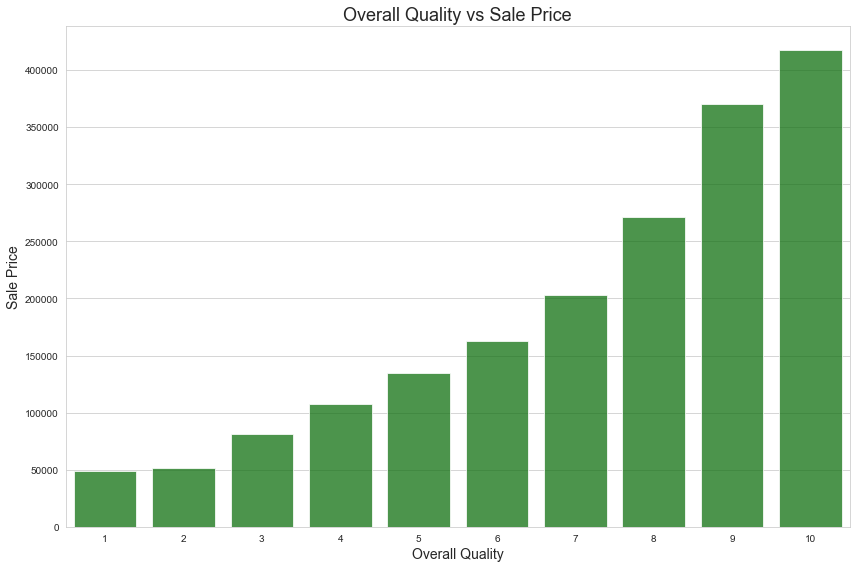

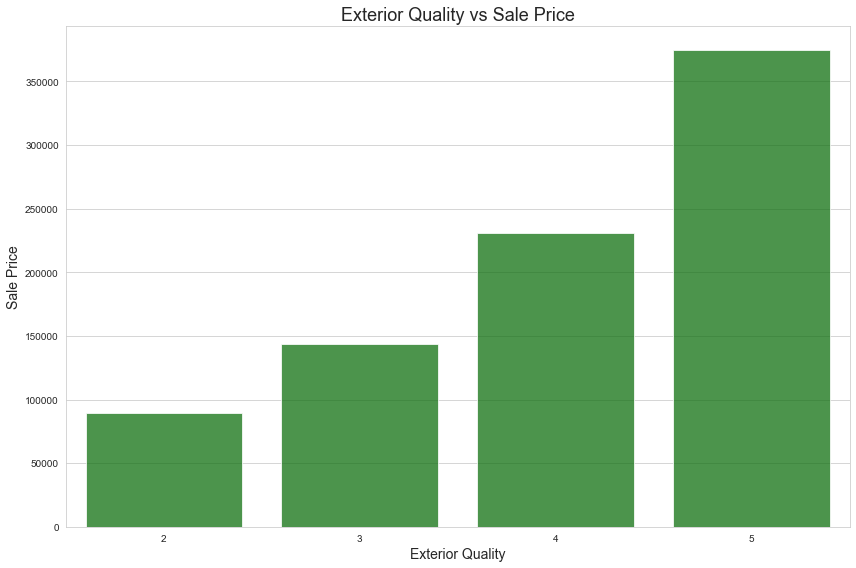

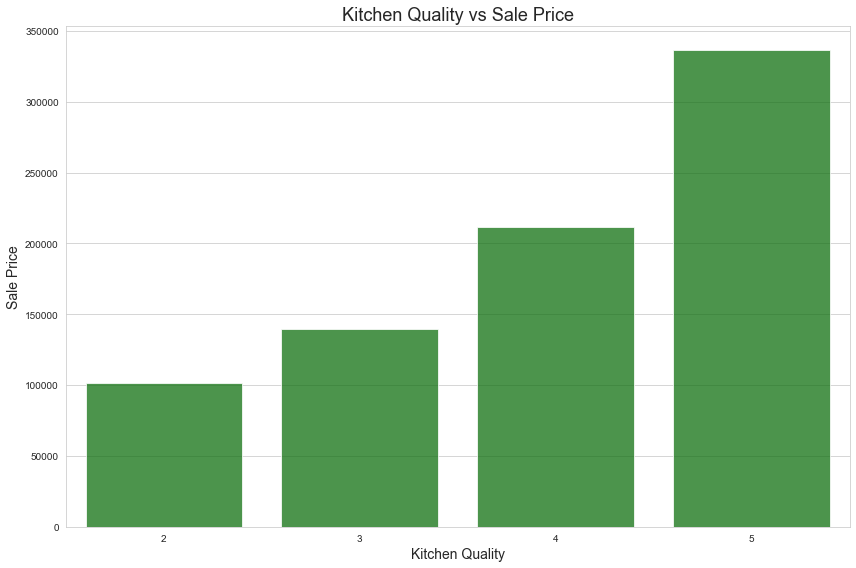

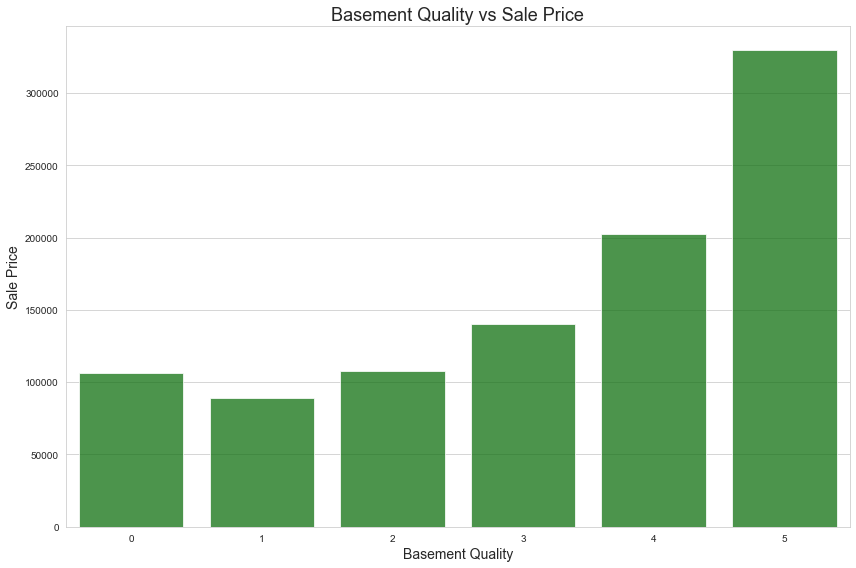

In [18]:
# column names to iterate through
features = [
    "overall_qual",
    "exter_qual",
    "kitchen_qual",
    "bsmt_qual"
]

# column names transformed into more readable text for titles and labels
features_full = [
    "Overall Quality",
    "Exterior Quality",
    "Kitchen Quality",
    "Basement Quality"
]

# for loop to display and save graphs
for index, feature in enumerate(features):
    plt.figure(figsize=(12, 8))
    sns.barplot(
        data=housing, 
        x=feature, 
        y="saleprice",
        ci=None,
        color='green',
        alpha=.75
    )
    plt.title(f'{features_full[index]} vs Sale Price', fontsize=18)
    plt.xlabel(f'{features_full[index]}', fontsize=14)
    plt.ylabel('Sale Price', fontsize=14)

    plt.tight_layout()

    plt.savefig(f'../images/graphs/{feature}.png');

*Interpretation: These four bar graphs show a consistent increase in value as the quality increases. For the specific qualities, the value more than triples from one end of the scale to the other.*

### For loop to display and save multiple graphs

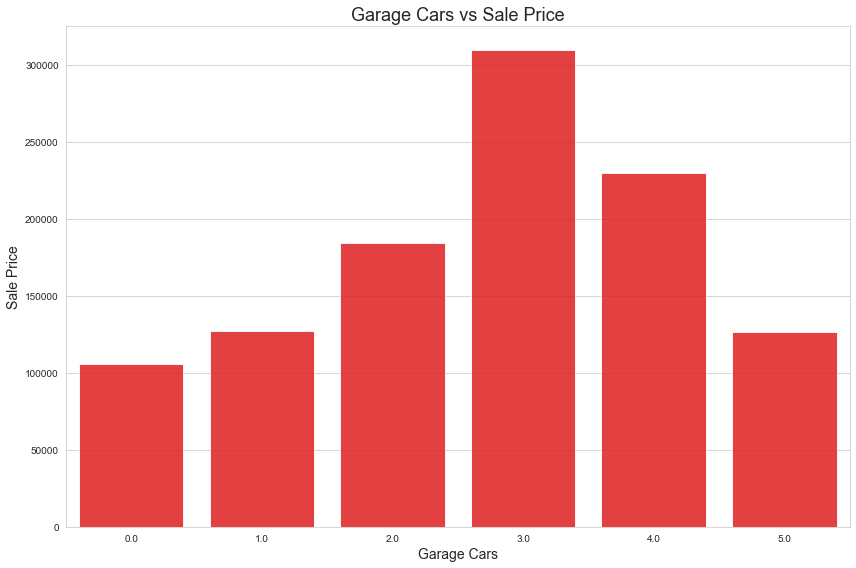

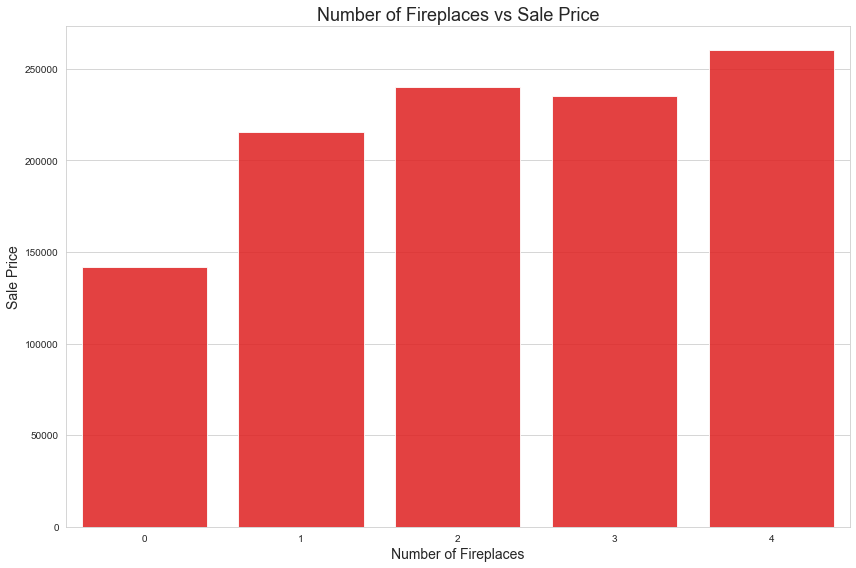

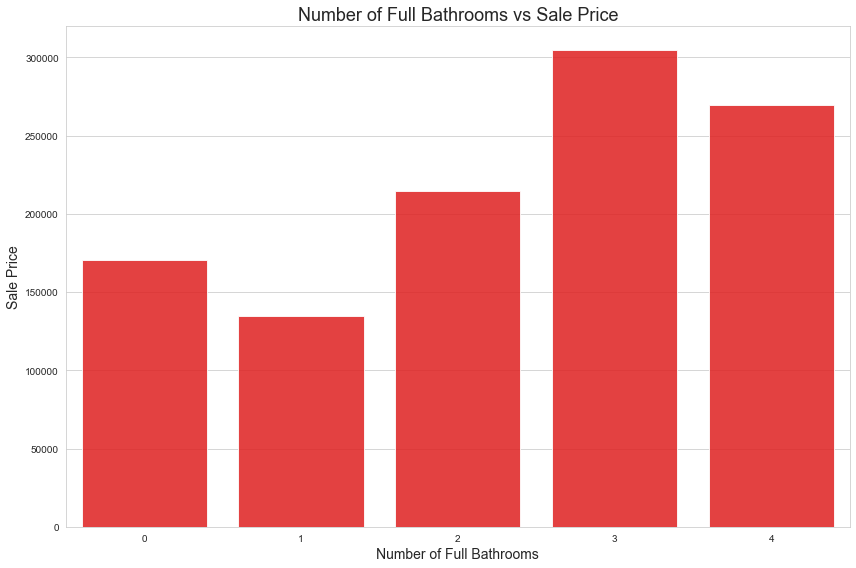

In [19]:
# column names to iterate through
features = [
    "garage_cars",
    "fireplaces",
    "full_bath",
]

# column names transformed into more readable text for titles and labels
features_full = [
    "Garage Cars",
    "Number of Fireplaces",
    "Number of Full Bathrooms",
]

# for loop to display and save graphs
for index, feature in enumerate(features):
    plt.figure(figsize=(12, 8))
    sns.barplot(
        data=housing, 
        x=feature, 
        y="saleprice", 
        ci=None,
        color='red',
        alpha=.85
    )
    plt.title(f'{features_full[index]} vs Sale Price', fontsize=18)
    plt.xlabel(f'{features_full[index]}', fontsize=14)
    plt.ylabel('Sale Price', fontsize=14)

    plt.tight_layout()

    plt.savefig(f'../images/graphs/{feature}.png');

*Interpretation: These bar graphs display other features that have an impact on house sale price. Going from a zero car garage to a three car garage can help triple the value of a home. Having just one fireplace can bump up the value by $50,000. The number of full bathrooms is a factor in sale price. There is a steady increase in value going from one, to two, to three full bathrooms*